In [1]:
import pickle
import os
import re
import json
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

from functools import reduce

In [2]:
# Enable automatic reloading of modules before executing code
%load_ext autoreload
%autoreload 2


import plotting as pl
from models import model as md
import utils as ut

In [3]:
def max_epoch(l_files):
    the_number = []
    for f in l_files:
        # extract number and store
        mtch = re.search(r"epoch(\d{4})\.txt$", f)
        try:
            the_number.append(mtch.groups()[0])
        except:
            the_number.append("0")
    the_number_int = [int(n) for n in the_number]
    max_value = max(the_number_int)
    indices = [index for index, value in enumerate(the_number_int) if value == max_value]
    file_to_extract = l_files[indices[0]]
    file_to_extract = file_to_extract.replace(".txt", ".tar")
    file_to_extract = file_to_extract.replace("sparse_embed", "model")
    return file_to_extract

In [4]:
def extract_results_id(lmbda, rnd_seed, modelversion, l_n, l_agreement, l_sparse, l_subjecttype, weights_only = True):
    all_dirs = []
    l_all_results = []
    l_all_models = []
    l_agreements = []
    l_sparsity = []
    l_subject = []
    for n in l_n:
        for la in lmbda:
            for agr in l_agreement:
                for sp in l_sparse:
                    for st in l_subjecttype:
                        if weights_only:
                            results_dir_ID = os.path.join(
                                "./results", modelversion, "weightsonly_only_weights", 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                            print(results_dir_ID)
                            results_dir_ID1 = os.path.join(
                                "./results", modelversion, 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                        elif weights_only == False:
                            results_dir_ID = os.path.join(
                                "./results", modelversion, "weightsonly_weights_and_intercepts", 
                                f'{n}d', str(la), agr, sp, st, f'seed{rnd_seed}'
                                )
                        if (weights_only == True) & (sp == "ID"):
                            all_dirs.append(results_dir_ID1)
                        else:
                            all_dirs.append(results_dir_ID)
                        l_agreements.append(agr)
                        l_sparsity.append(sp)
                        l_subject.append(st)
    for i, d in enumerate(all_dirs):
        file_path = os.path.join(d, 'results.json')
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                l_results = json.load(f)
                l_all_results.append(l_results)
        else:
            print(file_path + ": not found")
        l_files = os.listdir(results_dir_ID)
        latest_epoch = max_epoch(l_files)
        p = os.path.join(d, "model", latest_epoch)
        if os.path.isfile(p):
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["agreement"] = l_agreements[i]
            m["sparsity"] = l_sparsity[i]
            m["subject_type"] = l_subject[i]
            l_all_models.append(m)
        else:
            print(f'{p} does not exist')
    return l_all_models

In [5]:
def extract_results_avg(lmbda, rnd_seed, modelversion, l_n):
    all_dirs = []
    l_all_results = []
    l_all_models = []
    l_lambdas = []
    l_n_embed = []
    
    for n in l_n:
        for la in lmbda:
            results_dir_ID = os.path.join(
                "./results", modelversion, f'{n}d', str(la), f'seed{rnd_seed}'
            )
            all_dirs.append(results_dir_ID)
            l_lambdas.append(la)
            l_n_embed.append(n)
    for i, d in enumerate(all_dirs):
        file_path = os.path.join(d, 'results.json')
        if os.path.isfile(file_path):
            with open(file_path, "r") as f:
                l_results = json.load(f)
                l_all_results.append(l_results)
        else:
            print(file_path + ": not found")
        l_files = os.listdir(results_dir_ID)
        latest_epoch = max_epoch(l_files)
        p = os.path.join(d, "model", latest_epoch)
        if os.path.isfile(p):
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["n_embed"] = l_n_embed[i]
            m["lambda"] = l_lambdas[i]
            l_all_models.append(m)
        else:
            p = os.path.join(d, "model", latest_epoch)
            m = torch.load(p, weights_only=True, map_location=torch.device("cpu"))
            m["n_embed"] = l_n_embed[i]
            m["lambda"] = l_lambdas[i]
            l_all_models.append(m)
    return l_all_models

In [32]:
# id model
lmbda = [0.0005]
rnd_seed = '8876'
modelversion = "avg-ID-jointly"
l_n = [15]
l_agreement = [""]#["most", "few"] #"few", 
l_sparse = ["both"]#["ID", "both"] #"both", 
l_subjecttype = ["subjects_actual", "subjects_shuffled"]
l_all_models_id = extract_results_id(
    lmbda, rnd_seed, modelversion, l_n, l_agreement, l_sparse, l_subjecttype, weights_only=True
)

./results\avg-ID-jointly\weightsonly_only_weights\15d\0.0005\both\subjects_actual\seed8876
./results\avg-ID-jointly\weightsonly_only_weights\15d\0.0005\both\subjects_shuffled\seed8876


In [33]:
l_all_models_id

[{'epoch': 100,
  'model_state_dict': OrderedDict([('fc.weight',
                tensor([[0.0575, 0.9654, 0.7565,  ..., 0.1614, 1.1892, 0.5021],
                        [1.3373, 0.4584, 0.4639,  ..., 1.1319, 0.0952, 0.6424],
                        [1.8324, 0.0934, 0.1079,  ..., 1.5534, 0.0267, 0.8056],
                        ...,
                        [0.0242, 1.4951, 1.1871,  ..., 0.1042, 1.2973, 0.0511],
                        [0.1434, 0.4749, 0.3958,  ..., 0.5091, 1.0003, 0.5880],
                        [0.4628, 0.0915, 0.2436,  ..., 0.6233, 1.0203, 0.0345]])),
               ('individual_slopes.weight',
                tensor([[0.9279, 0.8308, 1.1648,  ..., 0.1475, 1.0587, 1.1841],
                        [0.5042, 0.9768, 1.2949,  ..., 0.8702, 0.9213, 1.1725],
                        [0.4915, 0.8749, 1.6845,  ..., 0.7596, 0.8803, 0.9875],
                        ...,
                        [1.1349, 0.9578, 1.5865,  ..., 0.8828, 0.9544, 0.9922],
                        [0.641

In [34]:
# avg model
lmbda = [0.0005]
rnd_seed = '8876'
modelversion = "avg"
l_n = [15]
l_subjecttype = ["subjects_actual", "subjects_shuffled"]
l_all_models_avg = extract_results_avg(lmbda, rnd_seed, modelversion, l_n)

In [35]:
len(l_all_models_avg)

1

In [36]:
l_all_models_id[0]

{'epoch': 100,
 'model_state_dict': OrderedDict([('fc.weight',
               tensor([[0.0575, 0.9654, 0.7565,  ..., 0.1614, 1.1892, 0.5021],
                       [1.3373, 0.4584, 0.4639,  ..., 1.1319, 0.0952, 0.6424],
                       [1.8324, 0.0934, 0.1079,  ..., 1.5534, 0.0267, 0.8056],
                       ...,
                       [0.0242, 1.4951, 1.1871,  ..., 0.1042, 1.2973, 0.0511],
                       [0.1434, 0.4749, 0.3958,  ..., 0.5091, 1.0003, 0.5880],
                       [0.4628, 0.0915, 0.2436,  ..., 0.6233, 1.0203, 0.0345]])),
              ('individual_slopes.weight',
               tensor([[0.9279, 0.8308, 1.1648,  ..., 0.1475, 1.0587, 1.1841],
                       [0.5042, 0.9768, 1.2949,  ..., 0.8702, 0.9213, 1.1725],
                       [0.4915, 0.8749, 1.6845,  ..., 0.7596, 0.8803, 0.9875],
                       ...,
                       [1.1349, 0.9578, 1.5865,  ..., 0.8828, 0.9544, 0.9922],
                       [0.6418, 0.8071, 1.483

In [37]:
l_df_train_eval_id = [
    pd.DataFrame({
        "ndim": l["n_embed"],
        "lambda": l["lambda"],
        "agreement": l["agreement"],
        "sparsity": l["sparsity"],
        "subject_type": l["subject_type"],
        "train_acc": l["train_accs"],
        "val_acc": l["val_accs"],
    })
    for l in l_all_models_id
]

In [38]:
l_df_train_eval_avg = [
    pd.DataFrame({
        "ndim": l["n_embed"],
        "lambda": l["lambda"],
        "train_acc": l["train_accs"],
        "val_acc": l["val_accs"],
    })
    for l in l_all_models_avg
]

In [39]:
df_train_eval_id = reduce(lambda x, y: pd.concat([x, y], axis=0, ignore_index=True), l_df_train_eval_id)

In [40]:
df_train_eval_id.head()

,ndim,lambda,agreement,sparsity,subject_type,train_acc,val_acc
0,15,0.0005,,both,subjects_actual,0.460728,0.479997
1,15,0.0005,,both,subjects_actual,0.510676,0.568860
2,15,0.0005,,both,subjects_actual,0.615376,0.634360
3,15,0.0005,,both,subjects_actual,0.643043,0.641598
4,15,0.0005,,both,subjects_actual,0.648844,0.643992


In [41]:
df_train_eval_id.sort_values("val_acc", ascending=False)

,ndim,lambda,agreement,sparsity,subject_type,train_acc,val_acc
94,15,0.0005,,both,subjects_actual,0.667071,0.659380
99,15,0.0005,,both,subjects_actual,0.667082,0.659374
98,15,0.0005,,both,subjects_actual,0.667480,0.659219
90,15,0.0005,,both,subjects_actual,0.666959,0.659095
95,15,0.0005,,both,subjects_actual,0.667364,0.659081
...,...,...,...,...,...,...,...
102,15,0.0005,,both,subjects_shuffled,0.597678,0.620326
1,15,0.0005,,both,subjects_actual,0.510676,0.568860
101,15,0.0005,,both,subjects_shuffled,0.502151,0.558790
0,15,0.0005,,both,subjects_actual,0.460728,0.479997


In [42]:
df_train_eval_avg = reduce(lambda x, y: pd.concat([x, y], axis=0, ignore_index=True), l_df_train_eval_avg)

In [43]:
df_train_eval_id["epoch"] = df_train_eval_id.groupby(["ndim", "lambda", "agreement", "sparsity"]).cumcount()
df_train_eval_avg["epoch"] = df_train_eval_avg.groupby(["ndim", "lambda"]).cumcount()
df_train_eval_avg["subject_type"] = "subjects_actual"

In [44]:
df_train_eval_id.head()

,ndim,lambda,agreement,sparsity,subject_type,train_acc,val_acc,epoch
0,15,0.0005,,both,subjects_actual,0.460728,0.479997,0
1,15,0.0005,,both,subjects_actual,0.510676,0.568860,1
2,15,0.0005,,both,subjects_actual,0.615376,0.634360,2
3,15,0.0005,,both,subjects_actual,0.643043,0.641598,3
4,15,0.0005,,both,subjects_actual,0.648844,0.643992,4


In [45]:
df_train_eval_id.groupby(["ndim", "lambda", "agreement", "sparsity"]).count()

,,,,subject_type,train_acc,val_acc,epoch
ndim,lambda,agreement,sparsity,,,,
15,0.0005,,both,200,200,200,200


In [46]:
df_train_eval_long_id = pd.melt(
    df_train_eval_id, 
    id_vars=["ndim", "lambda", "agreement", "sparsity", "subject_type", "epoch"], 
    value_vars = ["train_acc", "val_acc"], 
    var_name = "Variable",
    value_name = "Accuracy"
)

In [47]:
df_train_eval_long_avg = pd.melt(
    df_train_eval_avg, 
    id_vars=["ndim", "lambda", "epoch"], 
    value_vars = ["train_acc", "val_acc"], 
    var_name = "Variable",
    value_name = "Accuracy"
)

In [48]:
df_train_eval_long_id['lambda_ndim'] = df_train_eval_long_id['lambda'].astype(str) + '_' + df_train_eval_long_id['ndim'].astype(str)
df_train_eval_long_id['agreement_sparsity'] = df_train_eval_long_id['agreement'].astype(str) + '_' + df_train_eval_long_id['sparsity'].astype(str)

In [49]:
df_train_eval_long_id.query("epoch == 1499 & Variable == 'val_acc'").sort_values("Accuracy")

,ndim,lambda,agreement,sparsity,subject_type,epoch,Variable,Accuracy,lambda_ndim,agreement_sparsity


In [50]:
df_train_eval_long_id.head()

,ndim,lambda,agreement,sparsity,subject_type,epoch,Variable,Accuracy,lambda_ndim,agreement_sparsity
0,15,0.0005,,both,subjects_actual,0,train_acc,0.460728,0.0005_15,_both
1,15,0.0005,,both,subjects_actual,1,train_acc,0.510676,0.0005_15,_both
2,15,0.0005,,both,subjects_actual,2,train_acc,0.615376,0.0005_15,_both
3,15,0.0005,,both,subjects_actual,3,train_acc,0.643043,0.0005_15,_both
4,15,0.0005,,both,subjects_actual,4,train_acc,0.648844,0.0005_15,_both


In [51]:
df_id_best = df_train_eval_long_id.query("`lambda` == 0.0005 & ndim == 15 & subject_type == 'subjects_actual'").copy()
df_id_best["id_level"] = "ID"

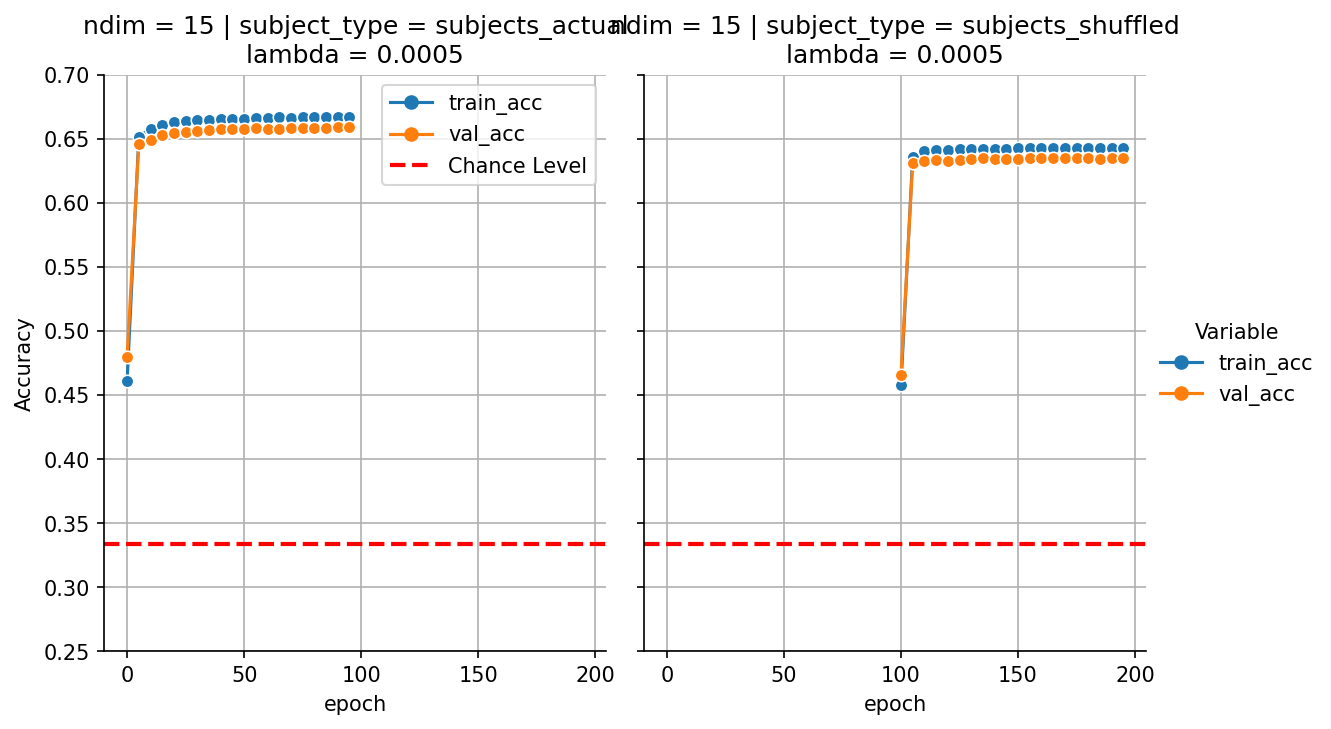

In [52]:
# Create the FacetGrid without specifying an external axis
g = sns.relplot(
    data=df_train_eval_long_id.query("epoch % 5 == 0"), 
    x='epoch', y='Accuracy', 
    col='subject_type', row="ndim", height=4, hue="Variable",
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(.25, .7)
    if i == 0:
        ax.legend()

# Embed constant in the title of each facet
constant = "lambda = 0.0005"
for ax in g.axes.flat:
    # Get the existing title
    title = ax.get_title()
    # Add the constant to the title
    ax.set_title(f"{title}\n{constant}")

# Adjust the plot size
g.fig.set_size_inches(9, 5)
g.fig.set_dpi(150)

plt.show()

Evaluate winning model against best avg model

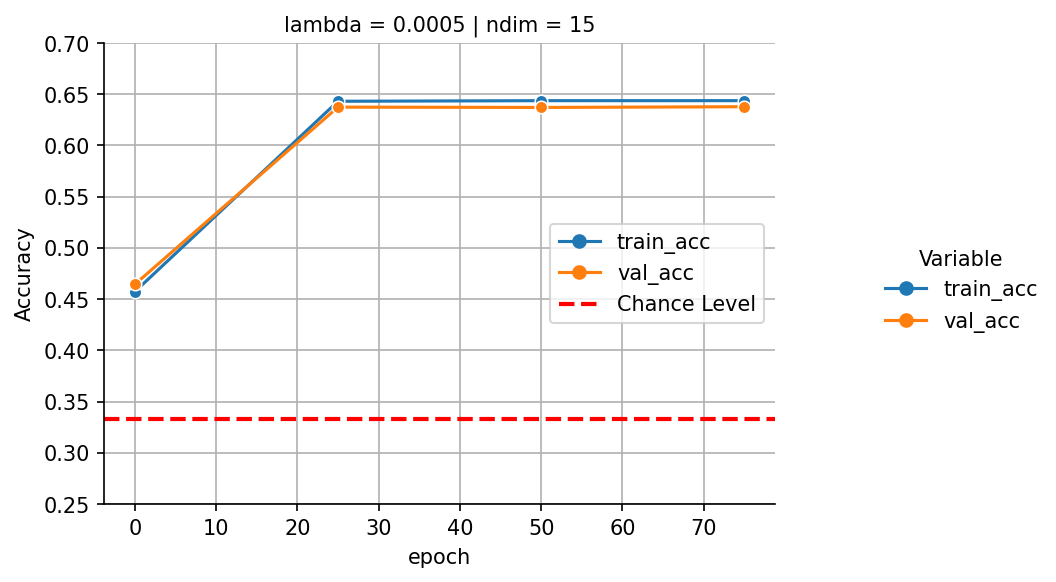

In [53]:
# Create the FacetGrid without specifying an external axis
g = sns.relplot(
    data=df_train_eval_long_avg.query("epoch <= 749 & epoch % 25 == 0"), x='epoch', y='Accuracy', 
    col='ndim', row="lambda", height=4, hue="Variable",
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(.25, .7)
    if i == 0:
        ax.legend()

# Adjust the plot size
g.fig.set_size_inches(8, 4)
g.fig.set_dpi(150)

plt.show()

In [54]:
df_avg_best = df_train_eval_long_avg.query("`lambda` == 0.0005 & ndim == 15").copy()
df_avg_best["id_level"] = "avg"

In [55]:
cols_shared = np.intersect1d(df_id_best.columns, df_avg_best.columns)
df_best_both = pd.concat([df_id_best[cols_shared], df_avg_best[cols_shared]])

In [56]:
df_best_both.head()

,Accuracy,Variable,epoch,id_level,lambda,ndim
0,0.460728,train_acc,0,ID,0.0005,15
1,0.510676,train_acc,1,ID,0.0005,15
2,0.615376,train_acc,2,ID,0.0005,15
3,0.643043,train_acc,3,ID,0.0005,15
4,0.648844,train_acc,4,ID,0.0005,15


C:\Users\MirkoThalmann\AppData\Local\Temp\ipykernel_23020\2098581452.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  g = sns.relplot(


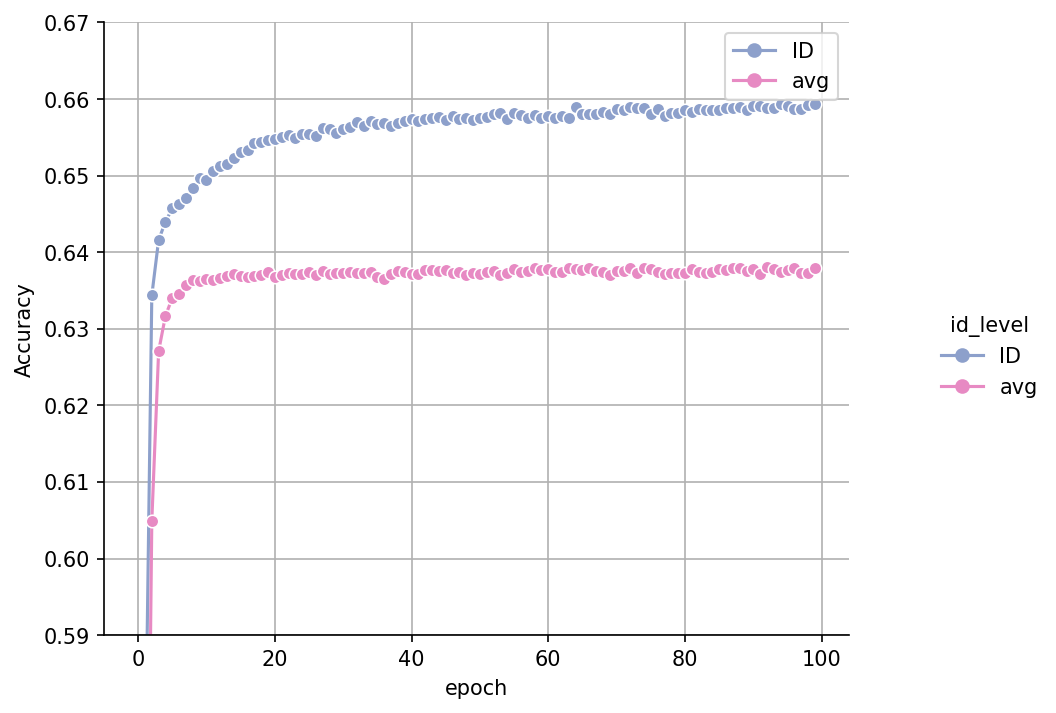

In [57]:
# Create the FacetGrid without specifying an external axis
palette = sns.color_palette("Set2")[2:]
g = sns.relplot(
    data=df_best_both.query("Variable == 'val_acc' & epoch <= 100"), x='epoch', y='Accuracy', 
    height=4, hue="id_level", palette=palette,
    marker="o", aspect=1, kind="line")
# Add gridlines to each facet 
for i, ax in enumerate(g.axes.flat): 
    ax.grid(True)
    #ax.axhline(y=.33333, color='red', linestyle='--', linewidth=2, label='Chance Level')
    
    #ax.set_xlim(0, 400)
    ax.set_ylim(.59, .67)
    if i == 0:
        ax.legend()

# Adjust the plot size
g.fig.set_size_inches(8, 5)
g.fig.set_dpi(150)

plt.show()

*TODOs
- run all models for at least 100 epochs, but then apply early stopping
- run avg model with 15 dims
- run avg model cutting the dimensionality itself
- run id models with shuffled ids, and with actual ids

In [58]:
l_all_models_id[0]["model_state_dict"]["fc.weight"].shape

torch.Size([15, 1854])

In [59]:
l_all_models_id[0]["model_state_dict"]["individual_slopes.weight"].shape

torch.Size([779, 15])

# Comparison per Participant

In [60]:
triplets_dir = './data/'
device = "cpu"
# load triplets into memory
train_triplets, test_triplets = ut.load_data_ID(
    device=device, triplets_dir=triplets_dir, testcase=False)


...Could not find any .npy files for current modality.
...Now searching for .txt files.



In [61]:
l_all_models_id[0]["subject_type"]

'subjects_actual'

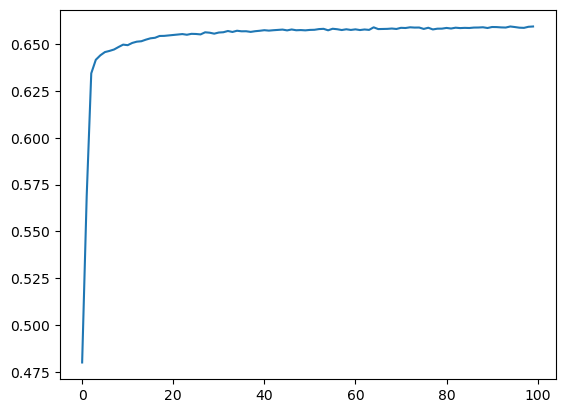

In [62]:
plt.plot(l_all_models_id[0]["val_accs"])

In [63]:
array_weights_items = np.array(l_all_models_id[0]["model_state_dict"]["fc.weight"]).transpose()

In [64]:
array_weights_id = l_all_models_id[0]["model_state_dict"]["individual_slopes.weight"]

In [65]:
anchors = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 0])]))
positives = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 1])]))
negatives = torch.Tensor(np.array([array_weights_items[i,:] for i in list(test_triplets[:, 2])]))

In [89]:
test_triplets

tensor([[ 464, 1385, 1038,    0],
        [1671, 1611,  698,    0],
        [ 740,  348,  293,    0],
        ...,
        [ 820, 1595,  101,  778],
        [ 195,   42,  872,  778],
        [1001, 1429,  155,  778]])

In [66]:
anchors = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 0])])
positives = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 1])])
negatives = np.array([array_weights_items[i,:] for i in list(test_triplets[:, 2])])

In [67]:
ids = test_triplets[:, 3].numpy()

In [68]:
anchors_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(anchors)]
positives_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(positives)]
negatives_weighted = [a*array_weights_id.numpy()[ids[id], :] for id, a in enumerate(negatives)]

In [69]:
from functools import partial

In [70]:
f_partial = partial(ut.delta_avg_id, anchors, positives, negatives, anchors_weighted, positives_weighted, negatives_weighted, ids)

In [71]:
ids_unique_sorted = np.sort(np.unique(ids))

In [72]:
l_deltas = list(map(f_partial, ids_unique_sorted))

In [73]:
l_delta_values = [delta[0] for delta in l_deltas]

In [74]:
df_ns = pd.DataFrame(ids, columns=['id'])
df_ns = df_ns.groupby("id")["id"].count() * 4
df_ns = df_ns.reset_index(name = "n_train")
df_ns["delta"] = l_delta_values

In [84]:
df_ns.to_csv("data/deltas-learned-weighted-embeddings.csv")

# Analyze improvement over "item difficulty"

In [93]:
df_diagnostic = pd.read_csv(filepath_or_buffer="data/diagnostic-triplets.csv")

In [94]:
def the_middle(l):
    return(sorted(l)[1])

In [95]:
df_test_triplets = pd.DataFrame(test_triplets.numpy())
df_test_triplets.columns = ["anchor", "positive", "negative", "ID"]
df_test_triplets["id_lo"] = df_test_triplets[["anchor", "positive", "negative"]].apply(min, axis=1)
df_test_triplets["id_hi"] = df_test_triplets[["anchor", "positive", "negative"]].apply(max, axis=1)
df_test_triplets["id_mid"] = df_test_triplets[["anchor", "positive", "negative"]].apply(the_middle, axis=1)

In [97]:
def merge_preds_with_diagnostic_items(id):
    df_test_triplets_0 = df_test_triplets.query(f"""ID == {id}""").copy()
    df_test_triplets_0["accuracy_avg"] = l_deltas[id][1]
    df_test_triplets_0["accuracy_ID"] = l_deltas[id][2]
    df_overlap_diagnostic = pd.merge(df_test_triplets_0, df_diagnostic, how = "inner", on = ["id_lo", "id_mid", "id_hi"])
    return df_overlap_diagnostic

In [98]:
l_merged = list(map(merge_preds_with_diagnostic_items, ids_unique_sorted))

In [99]:
from functools import reduce

In [100]:
df_items_results = pd.concat(l_merged, axis=0, ignore_index=True)

In [101]:
df_items_results.head()

,anchor,positive,negative,ID,id_lo,id_hi,id_mid,accuracy_avg,accuracy_ID,n_min,n_max,n_med,prop_max
0,1510,342,750,0,342,1510,750,True,True,15,67,31,0.592920
1,1611,279,920,0,279,1611,920,True,True,2,103,7,0.919643
2,1795,104,1381,0,104,1795,1381,False,True,22,50,29,0.495050
3,636,943,1748,0,636,1748,943,True,True,7,81,19,0.757009
4,1041,1818,39,0,39,1818,1041,True,True,4,93,11,0.861111


In [102]:
df_deltas = df_items_results.groupby(["id_lo", "id_mid", "id_hi", "prop_max"])[["accuracy_avg", "accuracy_ID"]].aggregate(["count", "mean"]).reset_index()

In [103]:
df_deltas.columns = ['_'.join(col).strip() for col in df_deltas.columns.values]

In [104]:
df_deltas.head()

,id_lo_,id_mid_,id_hi_,prop_max_,accuracy_avg_count,accuracy_avg_mean,accuracy_ID_count,accuracy_ID_mean
0,0,146,1534,0.843137,11,0.818182,11,0.818182
1,0,176,1227,0.736842,19,0.736842,19,0.684211
2,0,192,1088,0.823529,2,1.000000,2,1.000000
3,0,688,1307,0.818182,16,0.812500,16,0.812500
4,1,502,1157,0.575472,21,0.571429,21,0.619048


In [105]:
df_deltas["delta"] = df_deltas["accuracy_ID_mean"] - df_deltas["accuracy_avg_mean"]

In [106]:
df_deltas_filter = df_deltas.query("accuracy_avg_count >= 10").copy()
df_deltas_filter["prop_bin"] = pd.cut(df_deltas_filter["prop_max_"], bins=10, labels=False)
df_deltas_filter["prop_bin_label"] = pd.cut(df_deltas_filter["prop_max_"], bins=10)
df_deltas_agg = df_deltas_filter.groupby("prop_bin")["delta"].aggregate(["mean", "count"]).reset_index()

In [107]:
df_deltas_agg

,prop_bin,mean,count
0,0,0.087146,45
1,1,0.091697,84
2,2,0.096185,120
3,3,0.091689,116
4,4,0.082915,131
5,5,0.043784,101
6,6,0.039989,131
7,7,0.012364,84
8,8,0.009764,94
9,9,0.018735,91


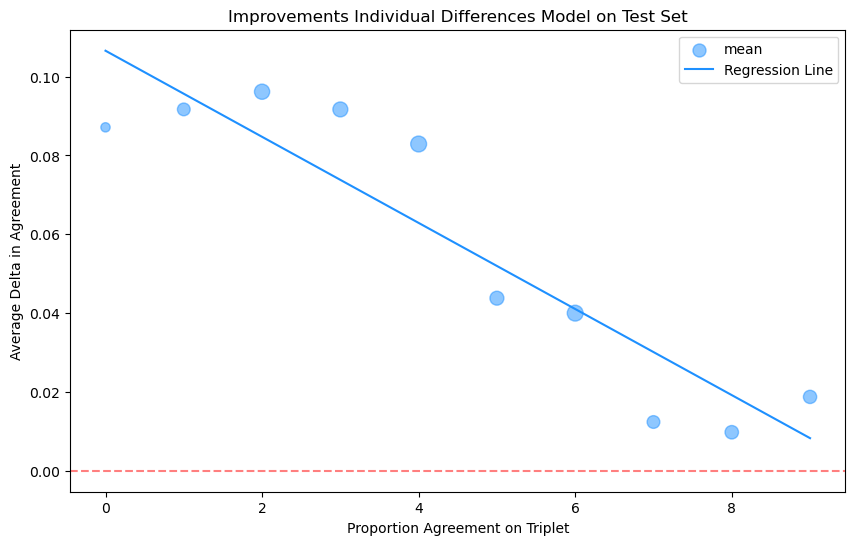

In [108]:
# Perform linear regression
slope, intercept = np.polyfit(df_deltas_agg['prop_bin'], df_deltas_agg['mean'], 1)
regression_line = slope * df_deltas_agg['prop_bin'] + intercept

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data=df_deltas_agg, x="prop_bin", y="mean", s=df_deltas_agg["count"], alpha=0.5, color="dodgerblue")
plt.plot(df_deltas_agg['prop_bin'], regression_line, color='dodgerblue', label='Regression Line')
plt.axhline(y = 0, c = "red", linestyle="--", alpha = .5)

# Adding titles and labels
plt.title('Improvements Individual Differences Model on Test Set')
plt.xlabel('Proportion Agreement on Triplet')
plt.ylabel('Average Delta in Agreement')
# Create legend for point sizes
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=5)
size_labels = [f"{int(float(label.split('{')[1].split('}')[0]))} (size)" for label in labels]
plt.legend(handles, size_labels, title="Count (Point Size)")
plt.legend()

In [155]:
df_test_triplets_0 = df_test_triplets.query("ID == 0").copy()
df_test_triplets_0["accuracy_avg"] = l_deltas[0][1]
df_test_triplets_0["accuracy_ID"] = l_deltas[0][2]
df_overlap_diagnostic = pd.merge(df_test_triplets_0, df_diagnostic, how = "inner", on = ["id_lo", "id_mid", "id_hi"])

,anchor,positive,negative,ID,id_lo,id_hi,id_mid,accuracy_avg,accuracy_ID
0,464,1385,1038,0,464,1385,1038,False,True
1,1671,1611,698,0,698,1671,1611,True,False
2,740,348,293,0,293,740,348,True,True
3,1081,101,339,0,101,1081,339,False,False
4,793,181,1243,0,181,1243,793,False,False


## Analyze by-participant weights

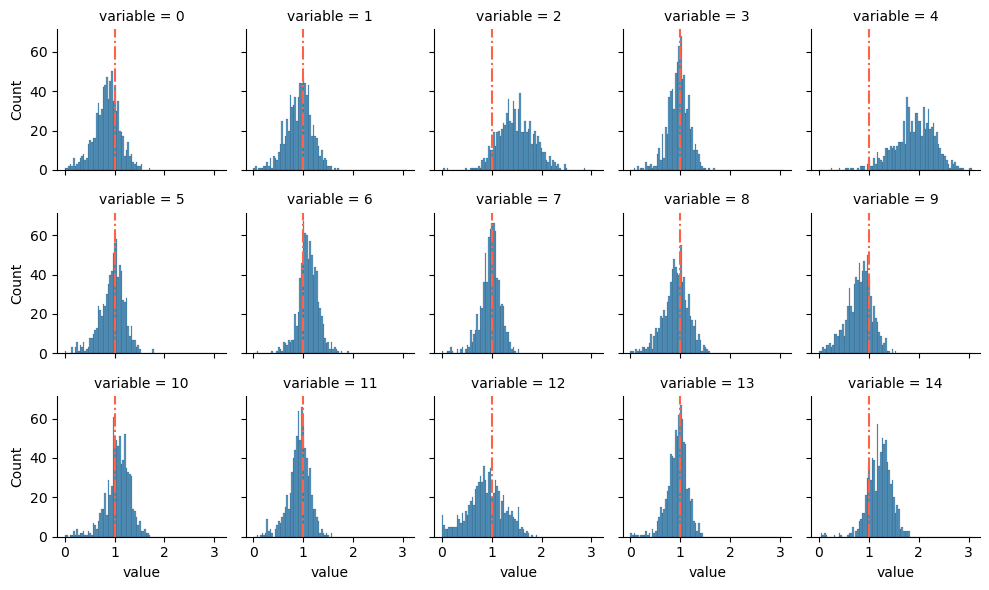

In [337]:
df_weights_dims = pd.DataFrame(array_weights_id.numpy())
df_weights_dims["ID"] = ids_unique_sorted
df_weights_dims_long = df_weights_dims.melt(id_vars="ID")
axes = sns.displot(data=df_weights_dims_long, x="value", col="variable", col_wrap = 5, height=2)
for ax in axes.axes.flat:
    ax.axvline(x=1, color="tomato", linestyle="-.")

In [352]:
df_avg_rep_dims = df_weights_dims_long.groupby("variable")["value"].mean().reset_index()
df_weights_dims_long = pd.merge(df_weights_dims_long, df_avg_rep_dims, how = "left", on = "variable", suffixes=["_id", "_avg"])

In [353]:
df_weights_dims_long["delta"] = df_weights_dims_long["value_id"] - df_weights_dims_long["value_avg"]
df_weights_dims_long.head()

,ID,variable,value_id,value_avg,delta
0,0,0,0.927880,0.85407,0.073810
1,1,0,0.504227,0.85407,-0.349843
2,2,0,0.491541,0.85407,-0.362530
3,3,0,1.041153,0.85407,0.187083
4,4,0,0.459488,0.85407,-0.394582


In [354]:
import scipy.stats as stats

In [355]:
df_dim_diff_agg = df_weights_dims_long.groupby("ID")["delta"].aggregate(["mean", "std", lambda x: stats.skew(x)]).reset_index()
df_dim_diff_agg.rename(columns={"<lambda_0>": "skew"}, inplace=True)

In [368]:
df_weights_dims.query("ID == 411").melt(id_vars="ID")

,ID,variable,value
0,411,0,1.238232
1,411,1,1.195708
2,411,2,1.998863
3,411,3,1.384256
4,411,4,2.294509
5,411,5,0.239127
6,411,6,1.294937
7,411,7,0.976332
8,411,8,1.052158
9,411,9,0.942403


<Axes: ylabel='Frequency'>

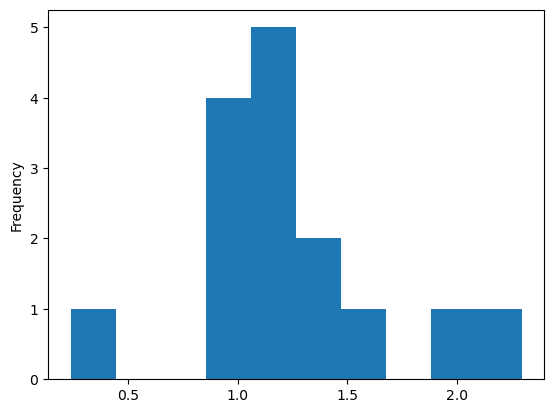

In [371]:
df_weights_dims.query("ID == 411").melt(id_vars="ID")["value"].plot.hist()

<Axes: ylabel='Frequency'>

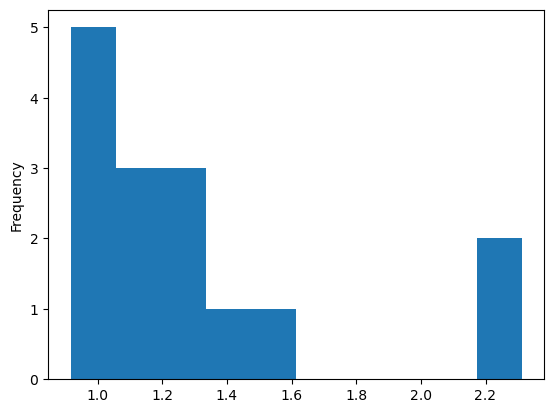

In [372]:
df_weights_dims.query("ID == 419").melt(id_vars="ID")["value"].plot.hist()

<Axes: ylabel='Frequency'>

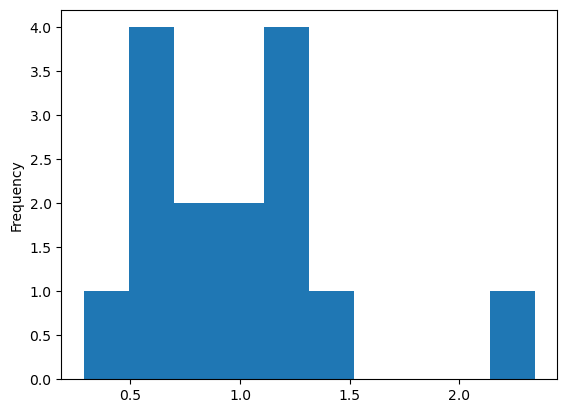

In [374]:
df_weights_dims.query("ID == 733").melt(id_vars="ID")["value"].plot.hist()

In [373]:
df_dim_diff_agg.query("skew > -.1 & skew < .1")

,ID,mean,std,skew
6,6,0.188536,0.112358,-0.047387
7,7,-0.031609,0.231438,0.096842
11,11,-0.185721,0.206961,-0.074760
25,25,0.031916,0.245650,0.048797
26,26,0.254640,0.300534,0.069276
...,...,...,...,...
733,733,-0.039234,0.275196,-0.010235
737,737,-0.055787,0.260529,-0.084612
754,754,-0.072526,0.313905,0.062249
759,759,0.095750,0.140856,0.038866


In [364]:
df_dim_diff_agg.sort_values("skew", ascending=True)

,ID,mean,std,skew
411,411,0.187221,0.293373,-1.977855
356,356,-0.069106,0.174828,-1.737360
300,300,-0.021904,0.296375,-1.728102
72,72,-0.114065,0.201749,-1.691627
703,703,-0.159014,0.277740,-1.570558
...,...,...,...,...
74,74,-0.058198,0.138560,1.618558
289,289,0.075432,0.193345,1.653523
216,216,0.082257,0.175625,1.704969
688,688,0.188403,0.118079,1.862897


Text(0, 0.5, 'Standard Deviation of By-Participant Delta Distribution')

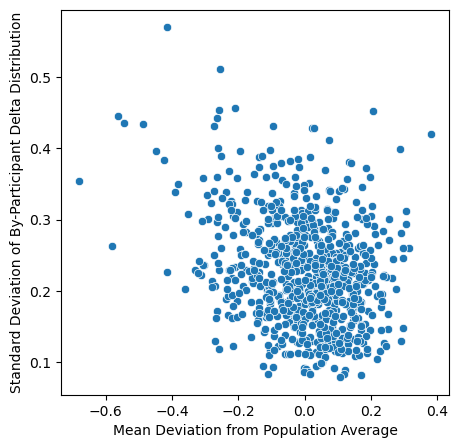

In [348]:
pl, axes = plt.subplots(1, 1, figsize=(5, 5))
_ = sns.scatterplot(data=df_dim_diff_agg, x="mean", y="std", ax=axes)
axes.set_xlabel("Mean Deviation from Population Average")
axes.set_ylabel("Standard Deviation of By-Participant Delta Distribution")

Text(0, 0.5, 'Skew of By-Participant Delta Distribution')

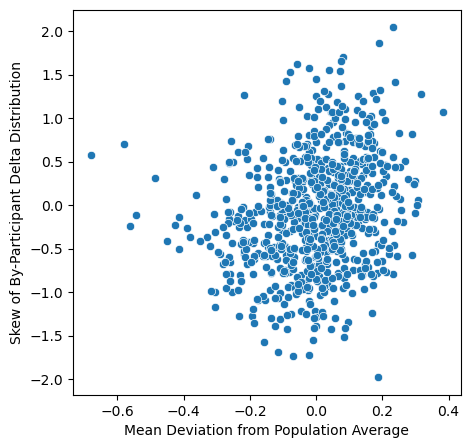

In [358]:
pl, axes = plt.subplots(1, 1, figsize=(5, 5))
_ = sns.scatterplot(data=df_dim_diff_agg, x="mean", y="skew", ax=axes)
axes.set_xlabel("Mean Deviation from Population Average")
axes.set_ylabel("Skew of By-Participant Delta Distribution")

In [313]:
df_weights_dims.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.927880,0.830833,1.164847,1.225828,1.257838,1.187505,1.031106,1.224584,1.005344,1.080317,0.821380,1.321615,0.147549,1.058718,1.184085
1,0.504227,0.976816,1.294943,0.740658,2.565734,0.564833,0.764947,0.947239,0.703014,0.777251,1.059374,0.903519,0.870192,0.921274,1.172450
2,0.491541,0.874862,1.684519,0.551077,1.885099,0.991585,0.786507,0.831801,0.955360,0.797346,1.139728,0.914502,0.759639,0.880284,0.987547
3,1.041153,0.765031,1.642219,1.170597,1.637621,0.870350,1.124397,0.784409,0.632105,0.625385,0.798290,0.881231,1.128220,0.774001,1.256981
4,0.459488,1.174740,1.028980,1.166695,1.367712,1.245181,1.015225,0.999737,0.577826,1.119727,1.102008,1.250571,0.593644,1.119225,1.293248
